In [2]:
import numpy as np
import healpy as hp
from healpy.rotator import Rotator
import pysm3
from pixell import reproject
import pysm3.units as u
import os
os.chdir('/home/ia404/gitreps/dustbias/mbatch')
from utils import hp_rotate
from sofind import DataModel

In [17]:
NSIDE = 2048
DUST_FREQ = 95

In [3]:
model='pysm_d1'
a, b = model.split('_')

In [4]:
print(a)
print(b)

pysm
d1


In [3]:
dm = DataModel.from_config('act_dr6v4')

In [8]:
options = {'skyfrac': 'GAL070', 'apodfact':'3dg'}
dm.get_mask_fn(subproduct='lensing_masks', mask_type='wide_v4_20220316',**options)

'/rds/project/dirac_vol5/rds-dirac-dp002/AdvACT/DR6_products/masks/act_mask_fejer1_20220316_GAL070_rms_70.00_downgrade_3dg.fits'

In [9]:
mask = dm.read_mask(subproduct='lensing_masks', mask_type='wide_v4_20220316',**options)

In [11]:
mask.shape

(5160, 21600)

In [ ]:
d1 = get_pysm_model('d1')

In [21]:
sky = pysm3.Sky(nside = 512, preset_strings = ['d1'])

In [22]:
a = sky.get_emission(95 * u.GHz)

In [23]:
b = a.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(95 * u.GHz))

In [26]:
pysm3.apply_smoothing_and_coord_transform(b, rot=hp.rotator.Rotator(coord='GC'))

<Quantity [[37.03782908, 37.49520991, 35.98824258, ..., 35.11949465,
            29.96388821, 37.08366186],
           [ 0.58146413, -0.49969421,  0.73185157, ..., -0.89006029,
             1.11530359, -1.29133924],
           [-0.39214829,  1.09189077, -0.56461694, ..., -1.55061415,
             1.47790234, -1.80031055]] uK_CMB>

In [25]:
hp.rotator(coord='GC')

TypeError: 'module' object is not callable

# PySM models

In [20]:
pysm3.apply_smoothing_and_coord_transform(d10, rot=hp.rotator(coord='GC'))

TypeError: 'module' object is not callable

In [27]:
def get_pysm_model_muKcmb_EQ(dust_subtype, nside=2048, freq_GHz=95):
    freq_out = freq_GHz * u.GHz
    sky = pysm3.Sky(nside = nside, preset_strings = [dust_subtype])
    dustmap = sky.get_emission(freq_out)
    dustmap_muKcmb = dustmap.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(freq_out))
    # dustmap_muKcmb_EQ = pysm3.apply_smoothing_and_coord_transform(dustmap_muKcmb, rot=Rotator(coord='GC'))
    return dustmap_muKcmb.value

def dustmap_muKcmb_fejer1cel(dust_subtype, shape, wcs, nside=2048, freq_GHz=95):

    dustmap_muKcmb = get_pysm_model_muKcmb_EQ(dust_subtype, nside=nside, freq_GHz=freq_GHz)

    return reproject.healpix2map(dustmap_muKcmb, shape, wcs, rot='gal,cel')

In [30]:
d1 = get_pysm_model_muKcmb_EQ('d1')

hp.map2alm_lsq did not converge in 10 iterations, residual relative error is 0.033


In [1]:
hp.mollview(d1[0])

NameError: name 'hp' is not defined

In [ ]:
hp.mollview(d1[0], norm='log', coord='C')

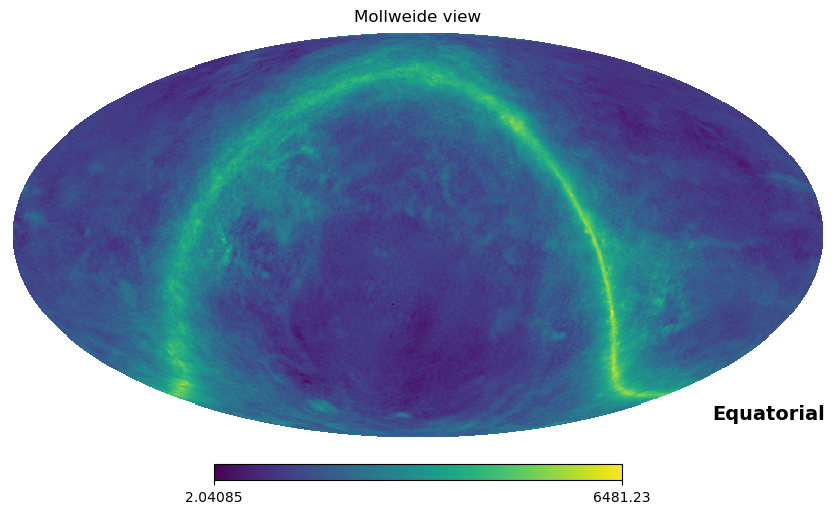

In [15]:
hp.mollview(d10[0], norm='log', coord='GC')

In [9]:
d10.value

array([[ 6.8518357 ,  6.5596323 ,  7.0800433 , ...,  6.3373904 ,
         5.9465594 ,  5.9031076 ],
       [ 0.11889318, -0.11574535,  0.123959  , ...,  0.12831947,
        -0.10252132,  0.11561063],
       [-0.0220654 ,  0.02067208,  0.05023796, ..., -0.12416466,
         0.11975007, -0.13141674]], dtype=float32)

In [4]:
d1 = get_pysm_model('d1')
d10 = get_pysm_model('d10')
d12 = get_pysm_model('d12')
d6 = get_pysm_model('d6')

KeyboardInterrupt: 

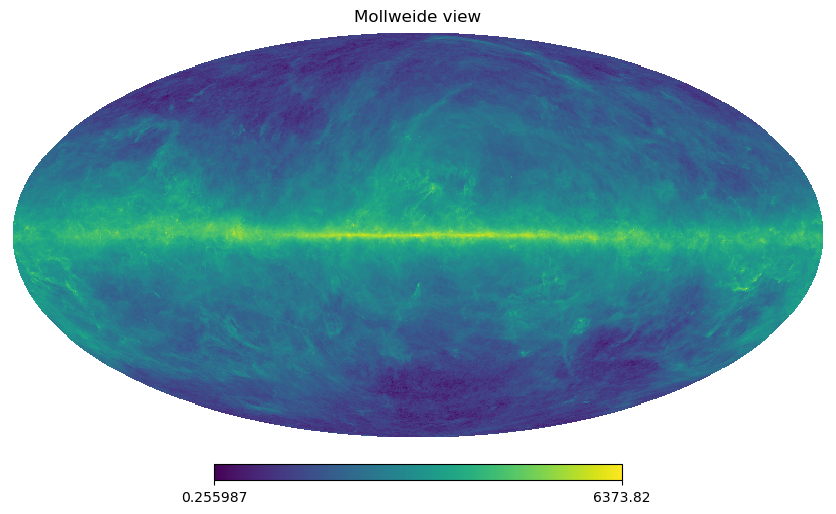

In [10]:
hp.mollview(d1[0], norm='log')

In [11]:
d1[0]

<Quantity [1.12743   , 0.98796517, 0.9778293 , ..., 1.2976111 , 1.3361689 ,
           1.1835353 ] uK_RJ>

In [12]:
u.uK_CMB

Unit("uK_CMB")

In [13]:
d1_muKcmb = d1.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(DUST_FREQ * u.GHz))

In [14]:
d1_muKcmb[0]

<Quantity [1.4161291, 1.2409519, 1.2282205, ..., 1.6298883, 1.6783195,
           1.4866012] uK_CMB>

In [15]:
2.7255e6

2725500.0